In [1]:
#sk-UcAmqsGNeZu7X2UMC1443W3lNxRyh7tefkfdgk4ZwoRknV2Y

In [2]:
#blur_img_path = '/content/drive/MyDrive/Neural networks project/train/blurred images'
#blurred_images = []
#for img in os.listdir(blur_img_path):
#  blurred_images.append(Image.open(os.path.join(blur_img_path, img)))
#
#for i in range(500):
#  blurred_images[i] = np.array(blurred_images[i])
#blurred_images = np.array(blurred_images)
#
#X = blurred_images
#labels = pd.read_csv('/content/drive/MyDrive/Neural networks project/train/labels.csv', index_col=0)
#y = np.array([float(1) if label=='dog' else float(0) for label in labels.values])
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
pip install stability-sdk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import cv2
from sklearn.utils import shuffle
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import io
import os
import warnings
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
import random
import tensorflow as tf
from tensorflow.keras.utils import  load_img

In [6]:
#path = '/content/drive/MyDrive/Neural networks project/train.zip'
#
#zip_data = ZipFile(path)
#zip_data.extractall('/content/drive/MyDrive/Neural networks project/train')

In [7]:
# IMG_HEIGHT = 512
# IMG_WIDTH = 512
# IMG_SIZE = (IMG_WIDTH , IMG_HEIGHT)
# IMG_CHANNELS = 3

# IMG_RGB_SIZE = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [8]:
# from google.colab import drive

# drive.mount('/content/drive/')

In [9]:
# ls

In [10]:
# filenames = os.listdir('/content/drive/MyDrive/Neural networks project/train/train')
# classes = []

# for filename in filenames:
#     category = filename.split('.')[0]
#     if category == 'dog':
#         classes.append(1)
#     else:
#         classes.append(0)

# data = pd.DataFrame({'filename' : filenames , 'class' : classes})
# data.head()

In [11]:
# data['class'].value_counts()

In [12]:
# sample = random.choice(filenames)
# image = load_img('/content/drive/MyDrive/Neural networks project/train/train/{}'.format(sample))
# plt.imshow(image)

In [13]:
# data['class1'] = data['class'].apply(lambda x: 'cat' if x== 0 else 'dog')
# data.drop(['class'] , inplace = True , axis = 1)
# data.rename(columns  = {'class1' : 'class'} , inplace =True)
# data.head()

In [14]:
# cat_data = data[data['class'] == 'cat'][:250]
# dog_data = data[data['class'] == 'dog'][:250]

# df = pd.concat([cat_data, dog_data])
# df = shuffle(df, random_state=7)

In [15]:
# df['class'].value_counts()

In [16]:
# images = []
# labels = df['class']

# PATH = '/content/drive/MyDrive/Neural networks project/train/train/'

In [17]:
# for filename in df['filename']:
#   img = Image.open(os.path.join(PATH, filename))
#   img = img.resize(IMG_SIZE)
#   images.append(img)

# df['images'] = images

In [18]:
# img = images[2]
# img_blur = img.filter(ImageFilter.GaussianBlur(2))

# fig, ax = plt.subplots(1, 2, figsize=(6, 4))
# ax[0].imshow(img)
# ax[1].imshow(img_blur)

In [19]:
# def add_Gaussian_noise(img):
#   blurry_img = img.filter(ImageFilter.GaussianBlur(2))
#   return blurry_img

In [20]:
# blurry_images = []

# for img in images:
#   blurry_images.append(add_Gaussian_noise(img))

# df['blurry_images'] = blurry_images

In [21]:
# plt.imshow(blurry_images[5])

In [22]:
# # Our Host URL should not be prepended with "https" nor should it have a trailing slash.
# os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# # Sign up for an account at the following link to get an API Key.
# # https://beta.dreamstudio.ai/membership

# # Click on the following link once you have created an account to be taken to your API Key.
# # https://beta.dreamstudio.ai/membership?tab=apiKeys

# # Paste your API Key below.

# os.environ['STABILITY_KEY'] = 'sk-UcAmqsGNeZu7X2UMC1443W3lNxRyh7tefkfdgk4ZwoRknV2Y'

In [23]:
# # Set up our connection to the API.
# stability_api = client.StabilityInference(
#     key=os.environ['STABILITY_KEY'], # API Key reference.
#     verbose=True, # Print debug messages.
#     engine="stable-diffusion-512-v2-0", # Set the engine to use for generation. For SD 2.0 use "stable-diffusion-v2-0".
#     # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0 stable-diffusion-768-v2-0 stable-inpainting-v1-0 stable-inpainting-512-v2-0
# )

In [24]:



## Set up our initial generation parameters.
#answers = stability_api.generate(
#    prompt="a rocket-ship launching from rolling greens with blue daisies and weeping willow trees under a blue alien sky, artstation, masterful, ghibli",
#    seed=892226758, # If a seed is provided, the resulting generated image will be deterministic.
#                    # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
#                    # Note: This isn't quite the case for Clip Guided generations, which we'll tackle in a future example notebook.
#    steps=30, # Amount of inference steps performed on image generation. Defaults to 30. 
#    cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
#                   # Setting this value higher increases the strength in which it tries to match your prompt.
#                   # Defaults to 7.0 if not specified.
#    width=512, # Generation width, defaults to 512 if not included.
#    height=512, # Generation height, defaults to 512 if not included.
#    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
#                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
#                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
#)
#
## Set up our warning to print to the console if the adult content classifier is tripped.
## If adult content classifier is not tripped, display generated image.
#for resp in answers:
#    for artifact in resp.artifacts:
#        if artifact.finish_reason == generation.FILTER:
#            warnings.warn(
#                "Your request activated the API's safety filters and could not be processed."
#                "Please modify the prompt and try again.")
#        if artifact.type == generation.ARTIFACT_IMAGE:
#            global img
#            img = Image.open(io.BytesIO(artifact.binary))
#            plot_img(img)
#            #img.save(str(artifact.seed)+ ".png") # Save our generated images its seed number as the filename.




In [25]:
# def generate_img(blurry_img, label):
#   # Set up our initial generation parameters.
#   answers2 = stability_api.generate(
#       prompt=label,
#       init_image=blurry_img, # Assign our previously generated img as our Initial Image for transformation.
#       start_schedule=0.05, # Set the strength of our prompt in relation to our initial image.
#       seed=123467458, # If attempting to transform an image that was previously generated with our API,
#                       # initial images benefit from having their own distinct seed rather than using the seed of the original image generation.
#       steps=30, # Amount of inference steps performed on image generation. Defaults to 30. 
#       cfg_scale=15, # Influences how strongly your generation is guided to match your prompt.
#                      # Setting this value higher increases the strength in which it tries to match your prompt.
#                      # Defaults to 7.0 if not specified.
#       width=512, # Generation width, defaults to 512 if not included.
#       height=512, # Generation height, defaults to 512 if not included.
#       sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
#                                                    # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
#                                                    # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
#   )

#   # Set up our warning to print to the console if the adult content classifier is tripped.
#   # If adult content classifier is not tripped, display generated image.
#   for resp in answers2:
#       for artifact in resp.artifacts:
#           if artifact.finish_reason == generation.FILTER:
#               warnings.warn(
#                   "Your request activated the API's safety filters and could not be processed."
#                   "Please modify the prompt and try again.")
#           if artifact.type == generation.ARTIFACT_IMAGE:
#               #global img2
#               img2 = Image.open(io.BytesIO(artifact.binary))
#               return img2              
#               #img2.save(str(artifact.seed)+ "-img2img.png") # Save our generated image with its seed number as the filename and the img2img suffix so that we know this is our transformed image.

In [26]:
# generated_images = []

# for img, label in zip(df['blurry_images'], df['class']):
#   generated_images.append(generate_img(img, label))

# df['generated_images'] = generated_images

# #i = df['images'][0]
# #si = df['blurry_images'][0]
# #label = df['class'][0]
# #print(label)
# #generated_images.append(generate_img(si, label))
# #fig, ax = plt.subplots(1, 3, figsize=(15,15))
# #ax[0].imshow(i)
# #ax[1].imshow(si)
# #ax[2].imshow(generated_images[0])

In [27]:
# df.to_csv('cats_vs_dogs', index=False)

# Image Compression

In [28]:
from sklearn.model_selection import train_test_split

blur_img_path = 'blurred images'
blurred_images = []
for img in os.listdir(blur_img_path):
    blurred_images.append(Image.open(os.path.join(blur_img_path, img)))

for i in range(500):
    blurred_images[i] = np.array(blurred_images[i])
blurred_images = np.array(blurred_images)

X = blurred_images
labels = pd.read_csv('labels.csv', index_col=0)
y = np.array([float(1) if label=='dog' else float(0) for label in labels.values])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(X_train.shape)

(350, 512, 512, 3)


In [30]:
# images = {'https://drive.google.com/drive/folders/1gIbW_b9sSQEGfGLvHgpe4SRKG3Hb62fq?usp=share_link'}
# print(images)

In [31]:
# #sample = random.choice(filenames)
# image = load_img('https://drive.google.com/drive/folders/1gIbW_b9sSQEGfGLvHgpe4SRKG3Hb62fq?usp=share_link')
# #plt.imshow(image)

In [32]:
# data['class'].value_counts()

In [33]:
# image = load_img('/content/drive/MyDrive/Neural networks project/train/images/{}'.format(sample))
# plt.imshow(image)

In [34]:
# labels = pd.read_csv('/content/drive/MyDrive/Neural networks project/train/labels.csv')
# pd.concat([data, labels ], axis=1)

In [35]:
# X = data.drop(['class'],axis='columns')
# y = data['class']

In [36]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# IMAGE_SIZE = 3

In [38]:

# img_path = '/content/drive/MyDrive/Neural networks project/train/images'
# images = []
# for img in os.listdir(img_path):
#   images.append((os.path.join(img_path, img)))

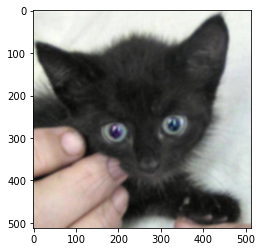

In [39]:
plt.imshow(X_train[0])

In [40]:
# print(images[0])

In [41]:
# X = images

In [42]:
print(X.max(), X.min())

255 0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

In [44]:
from keras.layers import Input, Dense
from keras.models import Model
import keras
from keras import layers

In [45]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [46]:
IMG_SHAPE = X.shape[1:]
# IMG_SHAPE = Input(shape=(512, 512, 3))
encoder, decoder = build_autoencoder(IMG_SHAPE, 400)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 400)               314573200 
                                                                 
 sequential_1 (Sequential)   (None, 512, 512, 3)       315359232 
                                                                 
Total params: 629,932,432
Trainable params: 629,932,432
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = autoencoder.fit(x=X_train, y=X_train, batch_size =  64,epochs=10,validation_data=[X_test, X_test])

Epoch 1/10
6/6 [==============================] - 87s 10s/step - loss: 222238608.0000 - val_loss: 4534640.5000
Epoch 2/10


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(x)

In [ ]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(25):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [ ]:
# def encoder(input_image):
#     layer1 = Dense(64, activation='relu')(input_image)
#     layer2 = Dense(1, activation='sigmoid')(layer1)
 
#     return layer2
 
# def decoder(encoded_image):
#     layer1 = Dense(64, activation='relu')(encoded_image)
#     layer2 = Dense(IMAGE_SIZE, activation='sigmoid')(layer1)
 
#     return layer2

In [ ]:
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Dropout, Flatten
# from keras.models import Model
# # from extra_keras_datasets import stl10

In [ ]:
# def encoder(input_image):
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_image) #96 x 96 x 32
#     conv1 = BatchNormalization()(conv1)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1) #96 x 96 x 32
#     conv1 = BatchNormalization()(conv1)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1) #96 x 96 x 32
#     conv1 = BatchNormalization()(conv1)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1) #96 x 96 x 32
#     # conv1 = BatchNormalization()(conv1)
#     # conv1 = MaxPooling2D(pool_size=(2, 2))(conv1) #48 x 48 x 32
#     # conv1 = Dropout(0.4)(conv1)
 
#     # conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1) #48 x 48 x 64
#     # conv2 = BatchNormalization()(conv2)
#     # conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2) #48 x 48 x 64
#     # conv2 = BatchNormalization()(conv2)
#     # conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2) #48 x 48 x 64
#     # conv2 = BatchNormalization()(conv2)
#     # conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2) #48 x 48 x 64
#     # conv2 = BatchNormalization()(conv2)
#     # conv2 = MaxPooling2D(pool_size=(2, 2))(conv2) #24 x 24 x 64
#     # conv2 = Dropout(0.4)(conv2)
 
#     # conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2) #24 x 24 x 64
#     # conv3 = BatchNormalization()(conv3)
#     # conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #24 x 24 x 64
#     # conv3 = BatchNormalization()(conv3)
#     # conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #24 x 24 x 64
#     # conv3 = BatchNormalization()(conv3)
#     # conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #24 x 24 x 64
#     # conv3 = BatchNormalization()(conv3)
#     # conv3 = MaxPooling2D(pool_size=(2, 2))(conv3) #12 x 12 x 64
#     # conv3 = Dropout(0.4)(conv3)
 
#     # conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3) #12 x 12 x 32
#     # conv4 = BatchNormalization()(conv4)
#     # conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) #12 x 12 x 32
#     # conv4 = BatchNormalization()(conv4)
#     # conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) #12 x 12 x 32
#     # conv4 = BatchNormalization()(conv4)
#     # conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) #12 x 12 x 32
 
#     encoded = BatchNormalization()(conv1)
 
#     return encoded
 
# def decoder(encoded_image):
#     conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_image) #12 x 12 x 32
#     conv5 = BatchNormalization()(conv5)
#     conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5) #12 x 12 x 32
#     conv5 = BatchNormalization()(conv5)
#     conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5) #12 x 12 x 32
#     conv5 = BatchNormalization()(conv5)
#     conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5) #12 x 12 x 32
#     conv5 = BatchNormalization()(conv5)
#     # conv5 = UpSampling2D((2,2))(conv5) #24 x 24 x 32
 
#     # conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #24 x 24 x 64
#     # conv6 = BatchNormalization()(conv6)
#     # conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #24 x 24 x 64
#     # conv6 = BatchNormalization()(conv6)
#     # conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #24 x 24 x 64
#     # conv6 = BatchNormalization()(conv6)
#     # conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #24 x 24 x 64
#     # conv6 = BatchNormalization()(conv6)
#     # conv6 = UpSampling2D((2,2))(conv6) #48 x 48 x 64
 
#     # conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #48 x 48 x 64
#     # conv7 = BatchNormalization()(conv7)
#     # conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7) #48 x 48 x 64
#     # conv7 = BatchNormalization()(conv7)
#     # conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7) #48 x 48 x 64
#     # conv7 = BatchNormalization()(conv7)
#     # conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7) #48 x 48 x 64
#     # conv7 = BatchNormalization()(conv7)
#     # conv7 = UpSampling2D((2,2))(conv7) #96 x 96 x 64
 
#     # conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7) #96 x 96 x 32
#     # conv8 = BatchNormalization()(conv8)
#     # conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8) #96 x 96 x 32
#     # conv8 = BatchNormalization()(conv8)
#     # conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8) #96 x 96 x 32
#     # conv8 = BatchNormalization()(conv8)
#     # conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8) #96 x 96 x 32
#     # conv8 = BatchNormalization()(conv8)
 
#     return Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv5) #96 x 96 x 3

In [ ]:
import keras
from keras import layers

# # This is the size of our encoded representations
# encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# # This is our input image
# #input_image = Input(shape=(96, 96, 3))
# input_img = keras.Input(shape=((512, 512, 3)))
# # "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = layers.Dense((512*512*3), activation='sigmoid')(encoded)

# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# X_train = X_train.reshape((len(X_train), 512, 512, 3))
# X_test = X_test.reshape((len(X_test),512, 512, 3))
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:4])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:4])))
print(X_train.shape)
print(X_test.shape)

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

In [ ]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:

# for i in range(len(decoded_imgs)):
#   print(decoded_imgs[i].shape)

decoded_imgs = decoded_imgs.reshape(-1,512, 512,3)
print(decoded_imgs.shape)

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    # ax = plt.subplot(2, n, i + 1)
    # plt.imshow(X_test[i])
    # plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# from keras.datasets import mnist

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
input_image = Input(shape=(512, 512, 3))
 
model = Model(input_image , decoder(encoder(input_image)))
model.compile(loss='mean_squared_error', optimizer='nadam')
 
# (x_train, _), (x_test, _) = stl10.load_data()
 
# Normalize data
X_train = X_train.astype('float32') 
X_train /= 255.0
X_test = X_test.astype('float32') 
X_test /= 255.0
 
# Training
model.fit(X_train, X_train, batch_size =  64, epochs= 10, validation_data=(X_test, X_test), shuffle=True)

In [ ]:
# input_image = Input(shape=(512, 512, 3 ))
  
# model = Model(input_image, decoder(encoder(input_image)))
# model.compile(loss='mean_squared_error', optimizer='nadam')
  
# #(X_train, _), (x_test, _) = mnist.load_data()
  
# # Normalize data
# #X_train = image.img_to_array(X_train).astype('float32')
# X_train = X_train.astype('float32') 
# X_train /= 255.0
# X_train = X_train.reshape((-1, 512, 512, 3))
 
# X_test = X_test.astype('float32') 
# X_test /= 255.0
# X_test = X_test.reshape((-1, 512, 512, 3))
  
# # Training
# model.fit(X_train, X_train, batch_size=64, epochs=10, validation_data=(X_test, X_test), shuffle=True)


In [ ]:
encoded_imgs = model.predict(X_test)
decoded_imgs = model.predict(encoded_imgs)

In [ ]:
X_test = X_test.reshape(-1,512, 512,3)
decoded_imgs = decoded_imgs.reshape(-1,512, 512,3)

In [ ]:
print(X_test.shape)
print(decoded_imgs.shape)

In [ ]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    # ax = plt.subplot(2, n, i + 1)
    # plt.imshow(X_test[i].reshape(512, 512))
    # plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
plt.imshow(images1[0])

## CNN

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Dropout, Flatten
from keras.models import Model
from extra_keras_datasets import stl10

In [ ]:
def encoder(input_image):
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_image) #96 x 96 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1) #96 x 96 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1) #96 x 96 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1) #96 x 96 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = MaxPooling2D(pool_size=(2, 2))(conv1) #48 x 48 x 32
    conv1 = Dropout(0.4)(conv1)
 
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1) #48 x 48 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2) #48 x 48 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2) #48 x 48 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2) #48 x 48 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = MaxPooling2D(pool_size=(2, 2))(conv2) #24 x 24 x 64
    conv2 = Dropout(0.4)(conv2)
 
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #24 x 24 x 64
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #24 x 24 x 64
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #24 x 24 x 64
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #24 x 24 x 64
    conv3 = BatchNormalization()(conv3)
    conv3 = MaxPooling2D(pool_size=(2, 2))(conv3) #12 x 12 x 64
    conv3 = Dropout(0.4)(conv3)
 
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3) #12 x 12 x 32
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) #12 x 12 x 32
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) #12 x 12 x 32
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) #12 x 12 x 32
 
    encoded = BatchNormalization()(conv4)
 
    return encoded
 
def decoder(encoded_image):
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4) #12 x 12 x 32
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5) #12 x 12 x 32
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5) #12 x 12 x 32
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5) #12 x 12 x 32
    conv5 = BatchNormalization()(conv5)
    conv5 = UpSampling2D((2,2))(conv5) #24 x 24 x 32
 
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #24 x 24 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #24 x 24 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #24 x 24 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #24 x 24 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = UpSampling2D((2,2))(conv6) #48 x 48 x 64
 
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6) #48 x 48 x 64
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7) #48 x 48 x 64
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7) #48 x 48 x 64
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv7) #48 x 48 x 64
    conv7 = BatchNormalization()(conv7)
    conv7 = UpSampling2D((2,2))(conv7) #96 x 96 x 64
 
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7) #96 x 96 x 32
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8) #96 x 96 x 32
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8) #96 x 96 x 32
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv8) #96 x 96 x 32
    conv8 = BatchNormalization()(conv8)
 
    return Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv8) #96 x 96 x 3

In [ ]:
input_image = Input(shape=(96, 96, 3))
 
model = Model(input_image , decoder(encoder(input_image)))
model.compile(loss='mean_squared_error', optimizer='nadam')
 
#(x_train, _), (x_test, _) = stl10.load_data()
 
# Normalize data
X_train = X_train.astype('float32') /= 255.0
X_test = X_test.astype('float32') /= 255.0
 
# Training
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), shuffle=True)